# Hypothesis: I think that students who intend to major in CS are more likely to get an A.

First I will read in the CSV and convert it to a column-oriented table.

In [130]:
%reload_ext autoreload
%autoreload 2
from data_utils import read_csv_rows, columnar

data_rows: list[dict[str, str]] = read_csv_rows('../../data/survey.csv')
columns: dict[str, list[str]] = columnar(data_rows)

## Next, I will select just the comp major column and the grade column. Here are the first five rows:

In [131]:
from data_utils import head, select
subset: dict[str, list[str]] = select(columns, ["comp_major", "grade"])
head(subset, 5)

{'comp_major': ['No', 'No', 'No', 'No', 'Yes - BS'],
 'grade': ['A', 'B', 'B', 'A', 'A']}

## Next, I will count how many comp majors there are and how many non-comp majors there are.

In [132]:
from data_utils import count
counts = count(subset['comp_major'])

number_of_comp_bs_majors: int = counts['Yes - BS']
number_of_comp_ba_majors: int = counts['Yes - BA']
number_of_comp_minors: int = counts['Yes - Minor']

NUMBER_OF_NON_COMP_MAJORS: int = counts['No']
NUMBER_OF_COMP_MAJORS: int = number_of_comp_bs_majors + number_of_comp_ba_majors + number_of_comp_minors

print(f"The number of non-comp majors is: {NUMBER_OF_NON_COMP_MAJORS}")
print(f"The number of comp majors is: {NUMBER_OF_COMP_MAJORS}")

The number of non-comp majors is: 331
The number of comp majors is: 171


## Next, I will seperate the grades of the comp majors and the non-comp majors. I used a mask function.

In [133]:
from data_utils import non_comp_major, masked

non_comp_mask: list[bool] = non_comp_major(subset)
non_comp_majors_grades: list[str] = masked(subset, non_comp_mask, "true")
comp_majors_grades: list[str] = masked(subset, non_comp_mask, "false")

## Next, I will count the grades of the non-comp majors and the grades of the comp majors. I will use these numbers to determine the percent of non-comp majors that expect to get an A and the percent of comp majors that expect to get an A.

In [134]:
from data_utils import grade_counts

grade_counts_for_non_comp_majors: dict[str, int] = grade_counts(non_comp_majors_grades)
grade_counts_for_comp_majors: dict[str, int] = grade_counts(comp_majors_grades)

number_of_non_comp_majors_expecting_an_a: int = grade_counts_for_non_comp_majors["A"]
number_of_comp_majors_expecting_an_a: int = grade_counts_for_comp_majors["A"]

percent_of_non_comp_majors_expecting_an_a: int = int(round((number_of_non_comp_majors_expecting_an_a / NUMBER_OF_NON_COMP_MAJORS) * 100))
percent_of_comp_majors_expecting_an_a: int = int(round((number_of_comp_majors_expecting_an_a / NUMBER_OF_COMP_MAJORS) * 100))

print(f"{number_of_non_comp_majors_expecting_an_a} non-comp majors expect to get an A. This is about {percent_of_non_comp_majors_expecting_an_a}% of all the non-comp majors.\n")
print(f"{number_of_comp_majors_expecting_an_a} comp majors expect to get an A. This is about {percent_of_comp_majors_expecting_an_a}% of all the comp majors.")

144 non-comp majors expect to get an A. This is about 44% of all the non-comp majors.

93 comp majors expect to get an A. This is about 54% of all the comp majors.


## Next, I will create a grade distribution chart for everyone in the course. In order to do this, I first have to count the grades for everyone.

Text(0.5, 1.0, 'Grades vs. Number of People')

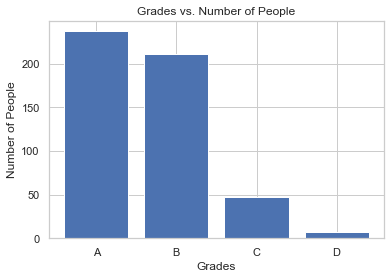

In [135]:
from matplotlib import pyplot as plt

grade_counts_for_everyone: dict[str, int] = grade_counts(subset['grade'])
sorted_grade_counts_for_everyone: dict[str, int] = dict(sorted(grade_counts_for_everyone.items()))

figure, axes = plt. subplots(1)
axes.bar(sorted_grade_counts_for_everyone.keys(), sorted_grade_counts_for_everyone.values())
plt.xlabel("Grades")
plt.ylabel("Number of People")
plt.title("Grades vs. Number of People")


## Next, I will create a grade distribution chart for the non-comp majors.

Text(0.5, 1.0, 'Grades vs. Number of People')

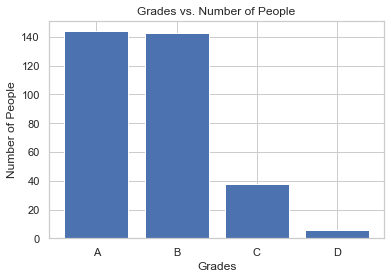

In [136]:
sorted_grade_counts_for_non_comp_majors: dict[str, int] = dict(sorted(grade_counts_for_non_comp_majors.items()))

figure, axes = plt. subplots(1)
axes.bar(sorted_grade_counts_for_non_comp_majors.keys(), sorted_grade_counts_for_non_comp_majors.values())
plt.xlabel("Grades")
plt.ylabel("Number of People")
plt.title("Grades vs. Number of People")

## Next, I will create a grade distribution chart for the comp majors.

Text(0.5, 1.0, 'Grades vs. Number of People')

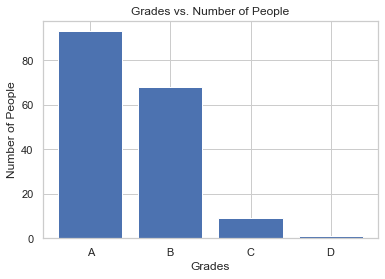

In [137]:
sorted_grade_counts_for_comp_majors: dict[str, int] = dict(sorted(grade_counts_for_comp_majors.items()))

figure, axes = plt. subplots(1)
axes.bar(sorted_grade_counts_for_comp_majors.keys(), sorted_grade_counts_for_comp_majors.values())
plt.xlabel("Grades")
plt.ylabel("Number of People")
plt.title("Grades vs. Number of People")

## Finally, I created a double bar chart that compares the percent of comp majors and non-comp majors who expect to get each grade. In order to figure out the percentages for the comp and non-comp majors I divided the grade counts for the two categories by the amount of people in the two categories. I watched [this] (https://www.youtube.com/watch?v=ZjQCPMO7LBE) youtube video to learn about the double bar chart.

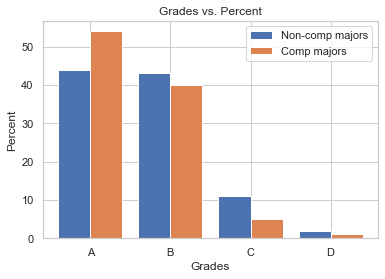

In [138]:
import numpy as np

w=0.4
x = ["A", "B", "C", "D"]
non_comp_majors = [44, 43, 11, 2]
comp_majors = [54, 40, 5, 1]

bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]

plt.bar(bar1,non_comp_majors,w,label="Non-comp majors")
plt.bar(bar2,comp_majors,w,label="Comp majors")

plt.xlabel("Grades")
plt.ylabel("Percent")
plt.title("Grades vs. Percent")
plt.xticks(bar1+w/2, x)
plt.legend()
plt.show()

# Conclusion

In conclusion, students who intend to major in CS are more likely to get an A. This might be because they're more interested in the class material. This might also be because they're more willing to spend extra time with the class materials because it could be a significant part of their major.